In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.style.use('seaborn-notebook')
from scipy import stats
import math

In [3]:
#Data loading
dataset2 = pd.read_excel(open('Online Retail.xlsx','rb'), sheet_name='Online Retail')


In [4]:
#Downsampling if needed
dataset = dataset2#[:20000]
dataset.shape

(541909, 8)

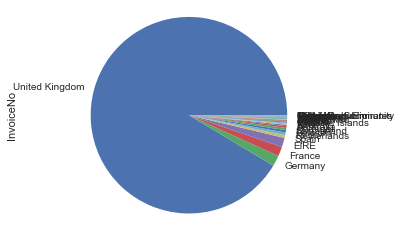

In [5]:
#Which country in the dataset
df = dataset.groupby('Country').count().sort_values('InvoiceNo', ascending = False)
df['InvoiceNo'].plot(kind = 'pie')
plt.axis('equal')
plt.show()

In [6]:
#We sort the dataset and check the time range
dataset = dataset.sort_values('InvoiceDate')
print('First order', dataset['InvoiceDate'].min())
print('Last order', dataset['InvoiceDate'].max())

First order 2010-12-01 08:26:00
Last order 2011-12-09 12:50:00


In [7]:
#Day 1 definition
today = datetime(2012,1,1,0,0)

In [8]:
#We mark the cancelled invoices
dataset['Cancelled'] = dataset['InvoiceNo'].apply(lambda x: 1 if str(x).startswith('C') else 0)
dataset[dataset['Cancelled'] == 1].shape

(9288, 9)

In [9]:
#We keep only the info from UK
dataset = dataset[dataset['Country'] == 'United Kingdom']
dataset.shape

(495478, 9)

In [10]:
#We drop the duplicates
dataset = dataset.drop_duplicates()
dataset.shape

(490300, 9)

In [11]:
#We drop the fields with no customer ID
dataset = dataset.dropna(axis = 0, how = 'any', subset = ['CustomerID'])
dataset.shape

(356728, 9)

In [12]:
#Any odd values ?
dataset.describe()

,Quantity,UnitPrice,CustomerID,Cancelled
count,356728.000000,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284,0.021027
std,264.998044,71.162330,1594.286219,0.143475
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14191.000000,0.000000
50%,4.000000,1.950000,15513.000000,0.000000
75%,12.000000,3.750000,16931.000000,0.000000
max,80995.000000,38970.000000,18287.000000,1.000000


In [16]:
dataset[dataset['UnitPrice'] == 0.00]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0
187613,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.0,17667.0,United Kingdom,0
279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,2011-07-26 12:24:00,0.0,16818.0,United Kingdom,0


In [14]:
#We clean the quantity < 0 and invoice not cancelled
#dataset = 
dataset[(dataset['Quantity'] < 0) & (dataset['Cancelled'] == 0)]
dataset.shape

(356728, 9)

In [17]:
#No free stuff in the dataset, must cost at least 1 penny
dataset = dataset[dataset['UnitPrice'] >= 0.01]
dataset.shape

(356238, 9)

In [15]:
#We clean all the weird Stockcodes
dataset = dataset[dataset['StockCode'] != 'M']
dataset = dataset[dataset['StockCode'] != 'BANK CHARGES']
dataset = dataset[dataset['StockCode'] != 'PADS']
dataset = dataset[dataset['StockCode'] != 'D']
dataset.shape

(356258, 9)

In [18]:
#What's the new database look now ?
dataset.describe()

,Quantity,UnitPrice,CustomerID,Cancelled
count,356238.000000,356238.000000,356238.000000,356238.000000
mean,11.171958,3.007523,15543.744193,0.020472
std,264.302263,21.146974,1594.241182,0.141609
min,-80995.000000,0.030000,12346.000000,0.000000
25%,2.000000,1.250000,14191.000000,0.000000
50%,4.000000,1.950000,15513.000000,0.000000
75%,12.000000,3.750000,16931.000000,0.000000
max,80995.000000,8142.750000,18287.000000,1.000000


In [19]:
#Any np.nan remaining ?
dataset.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Cancelled      0
dtype: int64

In [20]:
#What is the first price for each Stockcode
df = dataset[['UnitPrice', 'StockCode']].groupby('StockCode')
#df['UnitPrice'].agg({'mean': np.mean, 'first': 'first'})
#df = df.sort_values('InvoiceDate')
dictunitprice = df['UnitPrice'].agg('first').to_dict()
dataset['InitialPrice'] = dataset['StockCode'].apply(lambda x: dictunitprice.get(x, np.nan))
dataset[['StockCode', 'InitialPrice', 'UnitPrice']].head()

,StockCode,InitialPrice,UnitPrice
0,85123A,2.55,2.55
1,71053,3.39,3.39
2,84406B,2.75,2.75
3,84029G,3.39,3.39
4,84029E,3.39,3.39


In [21]:
#Item total calculation
dataset['Itemtotal'] = dataset['UnitPrice'] * dataset['Quantity']
dataset['ItemtotalInit'] = dataset['InitialPrice'] * dataset['Quantity']
dataset[['UnitPrice', 'InitialPrice', 'Quantity', 'Itemtotal', 'ItemtotalInit']].head()


,UnitPrice,InitialPrice,Quantity,Itemtotal,ItemtotalInit
0,2.55,2.55,6,15.30,15.30
1,3.39,3.39,6,20.34,20.34
2,2.75,2.75,8,22.00,22.00
3,3.39,3.39,6,20.34,20.34
4,3.39,3.39,6,20.34,20.34


In [22]:
#We convert some columns in categories
#dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('category')
#dataset['StockCode'] = dataset['StockCode'].astype('category')
#dataset['CustomerID'] = dataset['CustomerID'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356238 entries, 0 to 541893
Data columns (total 12 columns):
InvoiceNo        356238 non-null object
StockCode        356238 non-null object
Description      356238 non-null object
Quantity         356238 non-null int64
InvoiceDate      356238 non-null datetime64[ns]
UnitPrice        356238 non-null float64
CustomerID       356238 non-null float64
Country          356238 non-null object
Cancelled        356238 non-null int64
InitialPrice     356238 non-null float64
Itemtotal        356238 non-null float64
ItemtotalInit    356238 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 35.3+ MB


In [23]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,InitialPrice,Itemtotal,ItemtotalInit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,2.55,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,2.75,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,20.34,20.34


In [24]:
#Discount calculation
def discountcalc(entry):
    return -(entry.InitialPrice - entry.UnitPrice) / entry.InitialPrice

dataset['DiscountUnit'] = dataset.apply(discountcalc, axis = 1)
dataset[['DiscountUnit', 'UnitPrice', 'InitialPrice']].head()

,DiscountUnit,UnitPrice,InitialPrice
0,-0.0,2.55,2.55
1,-0.0,3.39,3.39
2,-0.0,2.75,2.75
3,-0.0,3.39,3.39
4,-0.0,3.39,3.39


In [25]:
#We create a invoicedf
df = dataset.groupby('InvoiceNo')
index = dataset['InvoiceNo'].unique()
temp = df['InvoiceDate'].agg(min)
InvoiceDate = [temp.loc[x] for x in index]
temp =df['Itemtotal'].agg(sum)
totalinvoice = [temp.loc[x] for x in index]
temp = df['ItemtotalInit'].agg(sum)
totalinvoiceinit = [temp.loc[x] for x in index]
temp = df['CustomerID'].agg('first')
CustomerID = [temp.loc[x] for x in index]
temp = df['Quantity'].agg(sum)
QuantitySum = [temp.loc[x] for x in index]

#Discount calculation
def discountcalc(entry):
    return -(entry.totalinvoiceinit - entry.totalinvoice) / entry.totalinvoiceinit

invoicedf = pd.DataFrame({'InvoiceDate':InvoiceDate, 'totalinvoice':totalinvoice, 'totalinvoiceinit':totalinvoiceinit,
                         'CustomerID':CustomerID, 'QuantitySum':QuantitySum}, index = index)
invoicedf['DiscountInvoice'] = invoicedf.apply(discountcalc, axis = 1)
invoicedf.index.names = ['InvoiceNo']
invoicedf.head()
#sample['InvoiceNo'].unique()

,CustomerID,InvoiceDate,QuantitySum,totalinvoice,totalinvoiceinit,DiscountInvoice
InvoiceNo,,,,,,
536365,17850.0,2010-12-01 08:26:00,40,139.12,139.12,-0.0
536366,17850.0,2010-12-01 08:28:00,12,22.20,22.20,-0.0
536368,13047.0,2010-12-01 08:34:00,15,70.05,70.05,-0.0
536367,13047.0,2010-12-01 08:34:00,83,278.73,278.73,-0.0
536369,13047.0,2010-12-01 08:35:00,3,17.85,17.85,-0.0


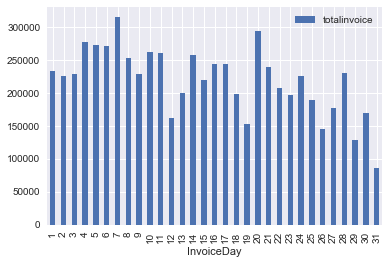

In [26]:
#What is the histogram of spendigs per day in the month
invoicedf['InvoiceDay'] = invoicedf['InvoiceDate'].apply(lambda x: x.day)
df = invoicedf[['InvoiceDay', 'totalinvoice']].groupby('InvoiceDay').sum()
df.plot(kind = 'bar')
plt.show()

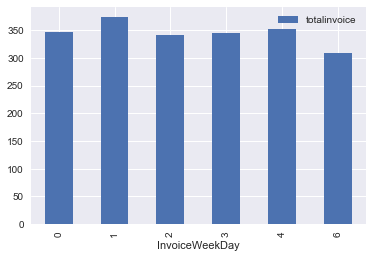

In [27]:
#What is the histogram of spendigs per day in the week
invoicedf['InvoiceWeekDay'] = invoicedf['InvoiceDate'].apply(lambda x: x.weekday())
df = invoicedf[['InvoiceWeekDay', 'totalinvoice']].groupby('InvoiceWeekDay').mean()
df.plot(kind = 'bar')
plt.show()

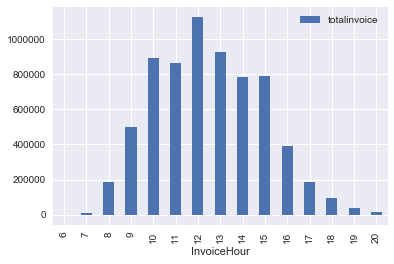

In [28]:
#What is the histogram of spendigs per hour in the day
invoicedf['InvoiceHour'] = invoicedf['InvoiceDate'].apply(lambda x: x.hour)
df = invoicedf[['InvoiceHour', 'totalinvoice']].groupby('InvoiceHour').sum()
df.plot(kind = 'bar')
plt.show()

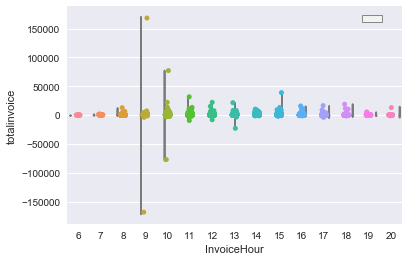

In [29]:
#What is the histogram of spendigs per hour in the day
df = invoicedf[['InvoiceHour', 'totalinvoice']]#.groupby('InvoiceHour').sum()
sns.stripplot(data=df, jitter=True, hue="InvoiceHour", y='totalinvoice' , x="InvoiceHour")
sns.violinplot(data=df, inner=None, color=".8", hue="InvoiceHour", y='totalinvoice' , x="InvoiceHour", sym='')
plt.legend(' ')
plt.show()

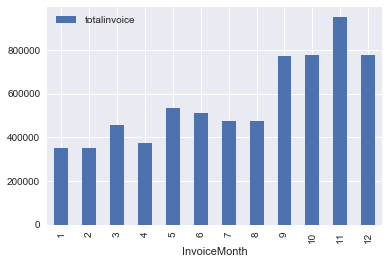

In [30]:
#What is the histogram of spendigs per month 
invoicedf['InvoiceMonth'] = invoicedf['InvoiceDate'].apply(lambda x: x.month)
df = invoicedf[['InvoiceMonth', 'totalinvoice']].groupby('InvoiceMonth').sum()
df.plot(kind = 'bar')
plt.show()

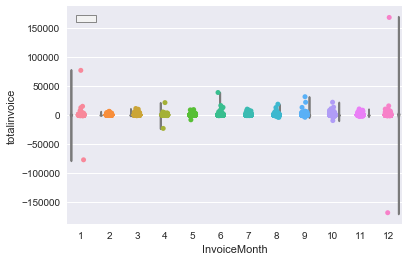

In [31]:
#invoicedf['InvoiceMonth'] = invoicedf['InvoiceDate'].apply(lambda x: x.month)
df = invoicedf[['InvoiceMonth', 'totalinvoice']]#.groupby('InvoiceMonth').sum()
sns.stripplot(data=df, jitter=True, hue="InvoiceMonth", y='totalinvoice' , x="InvoiceMonth")
sns.violinplot(data=df, inner=None, color=".8", hue="InvoiceMonth", y='totalinvoice' , x="InvoiceMonth")
plt.legend(' ')
plt.show()

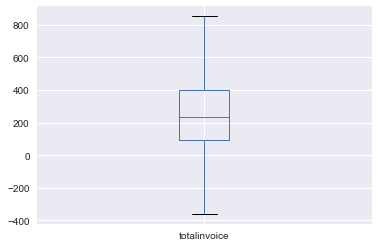

count     19649.000000
mean        346.442035
std        2043.136907
min     -168469.600000
25%          94.200000
50%         233.700000
75%         397.600000
max      168469.600000
Name: totalinvoice, dtype: float64

In [32]:
#What are th spendings per invoice
invoicedf['totalinvoice'].plot(kind = 'box', sym='')
plt.show()
invoicedf['totalinvoice'].describe()

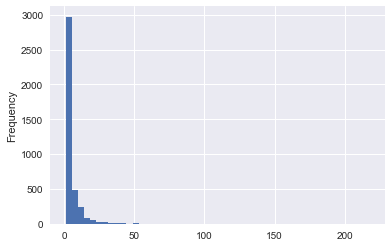

In [35]:
#How many invoice during the last year
df = invoicedf.groupby('CustomerID')['InvoiceDate'].count()
df.plot(kind = 'hist', bins = 50)
plt.show()

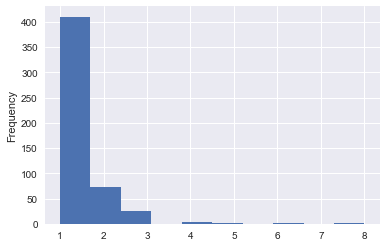

In [36]:
#How many invoice during the last 30 days
df = invoicedf[invoicedf['InvoiceDate'] > today - pd.Timedelta('30d')]
df = df.groupby('CustomerID')['InvoiceDate'].count()
df.plot(kind = 'hist')
plt.show()

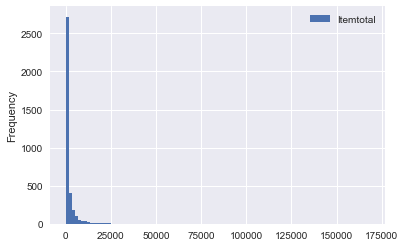

In [48]:
#Do we have many big sellers, dollar wise
df = dataset[dataset['Cancelled'] == 0]
df = df[['Itemtotal', 'StockCode']].groupby('StockCode').sum()
df.plot(kind = 'hist', bins = 100)
plt.show()

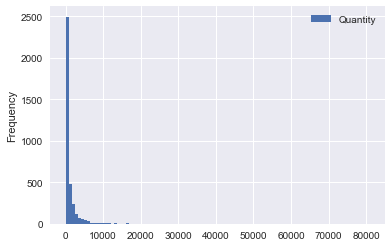

In [49]:
#Do we have many big sellers, quatity wise
df = dataset[dataset['Cancelled'] == 0]
df = df[['Quantity', 'StockCode']].groupby('StockCode').sum()
df.plot(kind = 'hist', bins = 100)
plt.show()

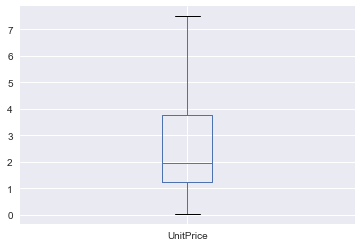

count    356238.000000
mean          3.007523
std          21.146974
min           0.030000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [37]:
#What are the prices in the dataset
df = dataset['UnitPrice']
df.plot(kind = 'box', sym = '')
plt.show()
df.describe()

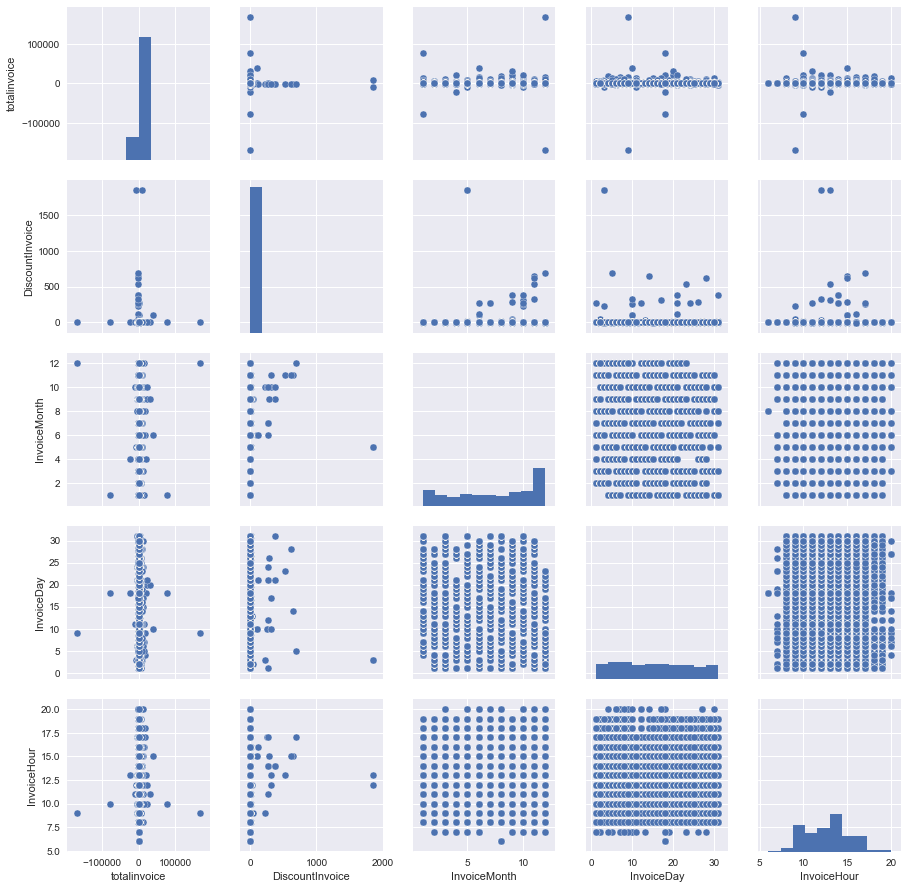

In [38]:
df = invoicedf[['totalinvoice', 'DiscountInvoice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']]#.corr()
sns.pairplot(df, diag_kind='hist', kind = 'scatter')
plt.show()

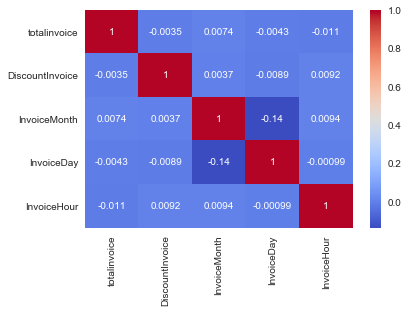

In [39]:
df = invoicedf[['totalinvoice', 'DiscountInvoice', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']].corr()
sns.heatmap(df, annot = True, cmap="coolwarm")

plt.show()

In [37]:
#We split the unit prices by quantile
classes = 10

#### CALULATION BEGINNING ####
divider = 100/classes

dataset['QuantUnitPrice'] = dataset['UnitPrice'].apply(lambda x: math.ceil(stats.percentileofscore(dataset['UnitPrice'],x, kind = 'mean')/divider))
dataset[['UnitPrice', 'QuantUnitPrice']].head()

,UnitPrice,QuantUnitPrice
0,2.55,7
1,3.39,8
2,2.75,7
3,3.39,8
4,3.39,8


In [38]:
#Dummies creation with qty adjustment for prices quantiles
dum = pd.get_dummies(dataset['QuantUnitPrice'], prefix = 'QuantPrice')
quantity = dataset[['Quantity']]
assembly = pd.concat([quantity, dum], axis =1)
for column in assembly.columns.values:
    if column != 'Quantity':
        assembly[column] = assembly[column] * assembly['Quantity']
#assembly
dataset = dataset.merge(assembly.iloc[:,1:], left_index = True, right_index = True)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,InitialPrice,...,QuantPrice_1,QuantPrice_2,QuantPrice_3,QuantPrice_4,QuantPrice_5,QuantPrice_6,QuantPrice_7,QuantPrice_8,QuantPrice_9,QuantPrice_10
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,2.55,...,0,0,0,0,0,0,6,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0,0,0,0,0,0,0,6,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,2.75,...,0,0,0,0,0,0,8,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0,0,0,0,0,0,0,6,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0,0,0,0,0,0,0,6,0,0


In [39]:
#Dummies creation with prices
dum = pd.get_dummies(dataset['QuantUnitPrice'], prefix = 'UnitPriceQ')
quantity = dataset[['UnitPrice']]
assembly = pd.concat([quantity, dum], axis =1)
for column in assembly.columns.values:
    if column != 'UnitPrice':
        assembly[column] = assembly[column] * assembly['UnitPrice']
#assembly
dataset = dataset.merge(assembly.iloc[:,1:], left_index = True, right_index = True)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,InitialPrice,...,UnitPriceQ_1,UnitPriceQ_2,UnitPriceQ_3,UnitPriceQ_4,UnitPriceQ_5,UnitPriceQ_6,UnitPriceQ_7,UnitPriceQ_8,UnitPriceQ_9,UnitPriceQ_10
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,2.55,...,0.0,0.0,0.0,0.0,0.0,0.0,2.55,0.00,0.0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.39,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,2.75,...,0.0,0.0,0.0,0.0,0.0,0.0,2.75,0.00,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.39,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.39,0.0,0.0


In [40]:
#Dummies creation with prices adjustment for discounts
dum = pd.get_dummies(dataset['QuantUnitPrice'], prefix = 'DiscountQuant')
discountdetail = dataset[[ 'DiscountUnit']]
assembly = pd.concat([discountdetail, dum], axis =1)
for column in assembly.columns.values:
    if (column != 'UnitPrice') or (column != 'DiscountUnit'):
        assembly[column] = assembly[column] * assembly['DiscountUnit']
#assembly
dataset = dataset.merge(assembly.iloc[:,1:], left_index = True, right_index = True)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,InitialPrice,...,DiscountQuant_1,DiscountQuant_2,DiscountQuant_3,DiscountQuant_4,DiscountQuant_5,DiscountQuant_6,DiscountQuant_7,DiscountQuant_8,DiscountQuant_9,DiscountQuant_10
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,2.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,2.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,3.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#we create a customerdf
df = invoicedf.groupby('CustomerID')

index = invoicedf['CustomerID'].unique()
firstpurchase = [df['InvoiceDate'].agg('first').loc[x] for x in index]
lastpurchase = [df['InvoiceDate'].agg('last').loc[x] for x in index]
totalspent = [df['totalinvoice'].agg('sum').loc[x] for x in index]
averagediscount = [df['DiscountInvoice'].agg('mean').loc[x] for x in index]
invoicecount = [df['InvoiceDate'].agg('count').loc[x] for x in index]
spentmin = [df['totalinvoice'].agg('min').loc[x] for x in index]
spentmax = [df['totalinvoice'].agg('max').loc[x] for x in index]
spentmean = [df['totalinvoice'].agg('mean').loc[x] for x in index]

customerdf = pd.DataFrame({'firstpurchase':firstpurchase, 'lastpurchase':lastpurchase, 'totalspent':totalspent,
                         'averagediscount':averagediscount, 'invoicecount':invoicecount, 'spentmin':spentmin,
                          'spentmax':spentmax, 'spentmean':spentmean}, index = index)
customerdf.index.names = ['CustomerID']
customerdf.head()

,averagediscount,firstpurchase,invoicecount,lastpurchase,spentmax,spentmean,spentmin,totalspent
CustomerID,,,,,,,,
17850.0,-0.003576,2010-12-01 08:26:00,35,2011-02-10 14:38:00,532.01,151.528000,-87.73,5303.48
13047.0,0.034086,2010-12-01 08:34:00,16,2011-10-24 14:02:00,562.40,193.068750,-83.24,3089.10
13748.0,-0.023144,2010-12-01 09:00:00,5,2011-09-05 09:45:00,335.80,189.650000,31.60,948.25
15100.0,0.000000,2010-12-01 09:09:00,6,2011-01-13 17:09:00,350.40,105.850000,-131.40,635.10
15291.0,-0.033662,2010-12-01 09:32:00,19,2011-11-14 11:02:00,461.16,239.553158,-35.49,4551.51


In [1]:
customerdf['invoicecount']

NameError: name 'customerdf' is not defined

In [41]:
#BOM creation 

In [42]:
#Additionnal calculation
customerdf['Nopurchaseday'] = customerdf['lastpurchase'].apply(lambda x: (today-x).days)
customerdf['Firstpurchaseday'] = customerdf['firstpurchase'].apply(lambda x: (today-x).days)
def frequcalc(entry):
    return  entry.Firstpurchaseday / entry.invoicecount
customerdf['freqpurchase'] = customerdf.apply(frequcalc, axis = 1)
customerdf[['lastpurchase', 'freqpurchase']].head()

,lastpurchase,freqpurchase
CustomerID,,
17850.0,2011-02-10 14:38:00,11.285714
13047.0,2011-10-24 14:02:00,24.687500
13748.0,2011-09-05 09:45:00,79.000000
15100.0,2011-01-13 17:09:00,65.833333
15291.0,2011-11-14 11:02:00,20.789474


In [43]:
#RFM calculation

#Number of classes
classes = 4

#### CALULATION BEGINNING ####
divider = 100/classes

customerdf['R'] = customerdf['Nopurchaseday'].apply(lambda x: classes + 1 - math.ceil(stats.percentileofscore(customerdf['Nopurchaseday'],x, kind = 'mean')/divider))
customerdf['F'] = customerdf['freqpurchase'].apply(lambda x: math.ceil(stats.percentileofscore(customerdf['freqpurchase'],x, kind = 'mean')/divider)) 
customerdf['M'] = customerdf['totalspent'].apply(lambda x: classes + 1 - math.ceil(stats.percentileofscore(customerdf['totalspent'],x, kind = 'mean')/divider))
customerdf['D'] = customerdf['averagediscount'].apply(lambda x: classes + 1 - math.ceil(stats.percentileofscore(customerdf['averagediscount'],x, kind = 'mean')/divider))

customerdf[['Nopurchaseday','R', 'F', 'M', 'D']].head()

,Nopurchaseday,R,F,M,D
CustomerID,,,,,
17850.0,324,1,1,1,3
13047.0,68,3,1,1,1
13748.0,117,2,3,2,3
15100.0,352,1,2,2,2
15291.0,47,3,1,1,3


In [44]:
#RFM dictionnary
dictR = customerdf['R'].to_dict()
dictF = customerdf['F'].to_dict()
dictM = customerdf['M'].to_dict()
dictD = customerdf['D'].to_dict()

In [45]:
#We create new field with RFM scores for invoices
invoicedf['R'] = invoicedf['CustomerID'].apply(lambda x: dictR.get(x, np.nan))
invoicedf['F'] = invoicedf['CustomerID'].apply(lambda x: dictF.get(x, np.nan))
invoicedf['M'] = invoicedf['CustomerID'].apply(lambda x: dictM.get(x, np.nan))
invoicedf['D'] = invoicedf['CustomerID'].apply(lambda x: dictD.get(x, np.nan))

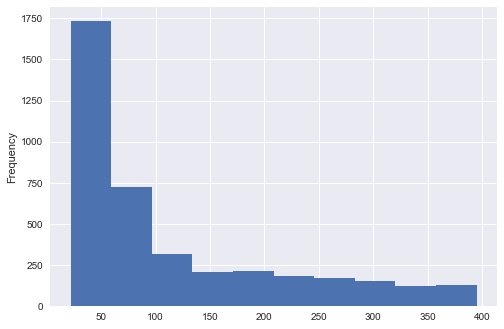

In [46]:
#How many days without purchase?
df = customerdf['Nopurchaseday']
df.plot(kind = 'hist')
plt.show()

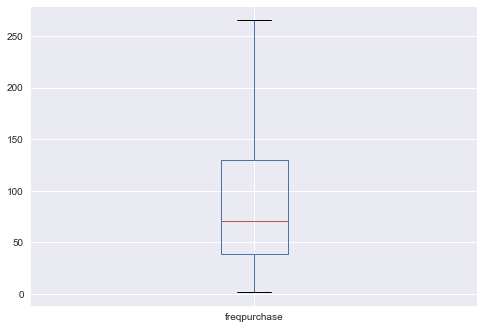

In [47]:
#How many days without purchase?
df = customerdf['freqpurchase']
df.plot(kind = 'box', sym = '')
plt.show()

In [48]:
df1 = invoicedf[invoicedf['CustomerID'] == 17850]
df1 = df1.sort_values('InvoiceDate', ascending=False)

In [49]:
#We construct the purchase history per customer

historylength = 5

#Empty dataframe creation
Orderdetail = []
Orderdetail.extend(['MONTH', 'WEEKDAY', 'HOUR', 'TOTAL', 'DISCOUNT'])
Orderdetail.extend([x for x in dataset.columns.values if x.startswith('UnitPriceQ_')])
Orderdetail.extend([x for x in dataset.columns.values if x.startswith('DiscountQuant_')])
finalcolumns  = []
counter = 0
for orderposition in range(historylength):
    counter += 1
    for column in Orderdetail:
        finalcolumns.append('INV{}-{}'.format(counter ,column))
finalcolumns
invoicebom = pd.DataFrame(index=finalcolumns)

#Invoice composition
quantlist = [x for x in dataset.columns.values if x.startswith('QuantPrice_')]
discountlist = [x for x in dataset.columns.values if x.startswith('DiscountQuant_')]
pricelist = [x for x in dataset.columns.values if x.startswith('UnitPriceQ_')]
for customerid in customerdf.index:
    #print('CustomerID : ', customerid)
    df1 = invoicedf[invoicedf['CustomerID'] == customerid]
    df1 = df1.sort_values('InvoiceDate', ascending=False)
    bom = []
    for invoiceno in df1.index[:historylength]:
        #print(invoiceno)
        df = dataset[dataset['InvoiceNo'] == invoiceno]
        df
        discunitmat = df[discountlist].sum().values
        qtymat = df[quantlist].sum().values
        totpricesmat = np.sum(np.multiply(df[quantlist].values, df[pricelist].values), axis=0)
        tempsum = np.dot(qtymat, totpricesmat)
        tempdisctotmat = -np.dot(discunitmat,tempsum) / tempsum
        disctotmat = [x if not np.isnan(x) else 0 for x in tempdisctotmat]
        #print('total per qt            -->', totpricesmat)
        #print('total invoice           -->', invoicedf['totalinvoice'].loc[invoiceno]) #print('total invoice -->', totpricesmat.sum())
        #print('Invoice month           -->', invoicedf['InvoiceDate'].loc[invoiceno].month)
        #print('Invoice daywe           -->', invoicedf['InvoiceDate'].loc[invoiceno].weekday())
        #print('Invoice hour            -->', invoicedf['InvoiceDate'].loc[invoiceno].hour)
        #print('Invoice discount per qt -->', discunitmat)
        #print('Invoice total discount  -->', invoicedf['DiscountInvoice'].loc[invoiceno])
        bom.append(invoicedf['InvoiceDate'].loc[invoiceno].month)
        bom.append(invoicedf['InvoiceDate'].loc[invoiceno].weekday())
        bom.append(invoicedf['InvoiceDate'].loc[invoiceno].hour) 
        bom.append(invoicedf['totalinvoice'].loc[invoiceno]) #Invoice total
        bom.append(invoicedf['DiscountInvoice'].loc[invoiceno])
        bom.extend(totpricesmat)
        bom.extend(disctotmat)
    bom = np.array(bom)
    arraylength = historylength * len(Orderdetail)
    if len(bom) > arraylength:
        bom = bom[:arraylength]
    else:
        bom = np.hstack([bom, np.zeros(arraylength - len(bom))])
    invoicebom[customerid] = pd.Series(bom, index=invoicebom.index)

In [50]:
#We merge the results with the customersdf
invoicebom = invoicebom.T
customerdf = customerdf.merge(invoicebom, left_index = True, right_index = True)

In [51]:
customerdf.isnull().sum(axis=0)

averagediscount          0
firstpurchase            0
invoicecount             0
lastpurchase             0
spentmax                 0
spentmean                0
spentmin                 0
totalspent               0
Nopurchaseday            0
Firstpurchaseday         0
freqpurchase             0
R                        0
F                        0
M                        0
D                        0
INV1-MONTH               0
INV1-WEEKDAY             0
INV1-HOUR                0
INV1-TOTAL               0
INV1-DISCOUNT            0
INV1-UnitPriceQ_1        0
INV1-UnitPriceQ_2        0
INV1-UnitPriceQ_3        0
INV1-UnitPriceQ_4        0
INV1-UnitPriceQ_5        0
INV1-UnitPriceQ_6        0
INV1-UnitPriceQ_7        0
INV1-UnitPriceQ_8        0
INV1-UnitPriceQ_9        0
INV1-UnitPriceQ_10       0
                        ..
INV4-DiscountQuant_6     0
INV4-DiscountQuant_7     0
INV4-DiscountQuant_8     0
INV4-DiscountQuant_9     0
INV4-DiscountQuant_10    0
INV5-MONTH               0
I

In [52]:
#Customer export
df = customerdf
df.to_csv('Z1-customerdf.csv')
df.head()

,averagediscount,firstpurchase,invoicecount,lastpurchase,spentmax,spentmean,spentmin,totalspent,Nopurchaseday,Firstpurchaseday,...,INV5-DiscountQuant_1,INV5-DiscountQuant_2,INV5-DiscountQuant_3,INV5-DiscountQuant_4,INV5-DiscountQuant_5,INV5-DiscountQuant_6,INV5-DiscountQuant_7,INV5-DiscountQuant_8,INV5-DiscountQuant_9,INV5-DiscountQuant_10
CustomerID,,,,,,,,,,,,,,,,,,,,,
17850.0,-0.003576,2010-12-01 08:26:00,35,2011-02-10 14:38:00,532.01,151.528000,-87.73,5303.48,324,395,...,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000
13047.0,0.034086,2010-12-01 08:34:00,16,2011-10-24 14:02:00,562.40,193.068750,-83.24,3089.10,68,395,...,-0.0,-0.0,-0.081546,-0.0,-0.0,-0.0,-0.0,-0.0,-0.040812,-0.048779
13748.0,-0.023144,2010-12-01 09:00:00,5,2011-09-05 09:45:00,335.80,189.650000,31.60,948.25,117,395,...,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000
15100.0,0.000000,2010-12-01 09:09:00,6,2011-01-13 17:09:00,350.40,105.850000,-131.40,635.10,352,395,...,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000
15291.0,-0.033662,2010-12-01 09:32:00,19,2011-11-14 11:02:00,461.16,239.553158,-35.49,4551.51,47,395,...,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000


In [53]:
customerdf['invoicecount'].describe()

count    3942.000000
mean        4.984526
std         8.522014
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       218.000000
Name: invoicecount, dtype: float64

In [54]:
customerdf[['averagediscount', 'invoicecount', 'spentmax', 'spentmean', 'spentmin', 'totalspent', 'Nopurchaseday','Firstpurchaseday', 'freqpurchase', 'R', 'F', 'M', 'D']].head()

,averagediscount,invoicecount,spentmax,spentmean,spentmin,totalspent,Nopurchaseday,Firstpurchaseday,freqpurchase,R,F,M,D
CustomerID,,,,,,,,,,,,,
17850.0,-0.003576,35,532.01,151.528000,-87.73,5303.48,324,395,11.285714,1,1,1,3
13047.0,0.034086,16,562.40,193.068750,-83.24,3089.10,68,395,24.687500,3,1,1,1
13748.0,-0.023144,5,335.80,189.650000,31.60,948.25,117,395,79.000000,2,3,2,3
15100.0,0.000000,6,350.40,105.850000,-131.40,635.10,352,395,65.833333,1,2,2,2
15291.0,-0.033662,19,461.16,239.553158,-35.49,4551.51,47,395,20.789474,3,1,1,3


In [55]:
#invoice decomposition by Stockcode
dum = pd.get_dummies(dataset['StockCode'], prefix = 'StockCode')
dum.index = dataset.index
qte = dataset[['Quantity']]
assembly = pd.concat([qte, dum], axis =1)
for column in assembly.columns.values:
    if column != 'Quantity':
        #print(column)
        assembly[column] = assembly[column] * assembly['Quantity']
#dataset = pd.concat([dataset,assembly.iloc[:,1:]], axis = 1)
df = dataset[['InvoiceNo']].merge(assembly, left_index = True, right_index = True)
df = df.drop('Quantity', axis = 1)
df = df.groupby('InvoiceNo').sum()
df.to_csv('Z1-BOMInvoice.csv')
df.shape

(19649, 3657)

In [56]:
df[df['StockCode_10080'] != 0]
for code, qty in df.loc[557568].items():
    if qty != 0:
        print(code, qty)

StockCode_10080 48
StockCode_20974 24
StockCode_21641 24
StockCode_22421 12
StockCode_22439 24
StockCode_22661 10
StockCode_23281 12
StockCode_23310 36


In [57]:
dataset[dataset['InvoiceNo'] == 557568]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,InitialPrice,...,DiscountQuant_1,DiscountQuant_2,DiscountQuant_3,DiscountQuant_4,DiscountQuant_5,DiscountQuant_6,DiscountQuant_7,DiscountQuant_8,DiscountQuant_9,DiscountQuant_10
234544,557568,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,10,2011-06-21 10:40:00,0.85,17629.0,United Kingdom,0,0.85,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234546,557568,10080,GROOVY CACTUS INFLATABLE,48,2011-06-21 10:40:00,0.39,17629.0,United Kingdom,0,0.85,...,0.292872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234545,557568,21641,ASSORTED TUTTI FRUTTI KEYRING BALL,24,2011-06-21 10:40:00,0.85,17629.0,United Kingdom,0,0.85,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234543,557568,20974,12 PENCILS SMALL TUBE SKULL,24,2011-06-21 10:40:00,0.65,17629.0,United Kingdom,0,0.65,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234541,557568,23281,FOLDING BUTTERFLY MIRROR RED,12,2011-06-21 10:40:00,0.83,17629.0,United Kingdom,0,0.83,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234540,557568,22421,LIPSTICK PEN FUSCHIA,12,2011-06-21 10:40:00,0.42,17629.0,United Kingdom,0,0.42,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234539,557568,22439,6 ROCKET BALLOONS,24,2011-06-21 10:40:00,0.65,17629.0,United Kingdom,0,0.65,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234542,557568,23310,BUBBLEGUM RING ASSORTED,36,2011-06-21 10:40:00,0.42,17629.0,United Kingdom,0,0.42,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
## invoice decomposition by price
dum = pd.get_dummies(dataset['StockCode'], prefix = 'PricePosition')
discount = dataset[['DiscountUnit']]
assembly = pd.concat([discount, dum], axis =1)
for column in assembly.columns.values:
    if column != 'DiscountUnit':
        assembly[column] = assembly[column] * assembly['DiscountUnit']
#dataset = pd.concat([dataset,assembly.iloc[:,1:]], axis = 1)
df = dataset[['InvoiceNo']].merge(assembly, left_index = True, right_index = True)
df = df.drop('Quantity', axis = 1)
df = df.groupby('InvoiceNo').sum()
df.to_csv('Z1-BOMPricedetails.csv')
df.shape

ValueError: labels ['Quantity'] not contained in axis

In [ ]:
#dataset[dataset['InvoiceNo'] == 536365]
dataset.shape

In [ ]:
df = dataset.groupby('InvoiceNo')
tosum = []
tosum.extend(['Itemtotal'])
tosum.extend([x for x in dataset.columns.values if x.startswith('StockCode_')])
tosum.extend([x for x in dataset.columns.values if x.startswith('PricePosition_')])

tomean = []
tomean.extend(['CustomerID'])

tomin = []
tomin.extend(['InvoiceDate'])

aggfeatures = {}
for x in tosum:
    aggfeatures[x] = 'sum'

for x in tomean:
    aggfeatures[str(x)] = ['mean']
    
for x in tomin:
    aggfeatures[str(x)] = ['min']
    
invoicedetail = df.agg(aggfeatures)

In [ ]:
invoicedetail.shape

In [ ]:
invoicedetail.head()